In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

import csv

In [2]:
# read the data from DataTrain.csv
data = pd.read_csv("DataTrain.csv")

# get label column
label = data["Category"]

# get the rest of the columns
X = data.drop("Category", axis=1)
X = X.drop("Id", axis=1)

X.shape

(100, 14)

In [3]:
# specify the visible GPU
gpus = tf.config.experimental.list_physical_devices('GPU')

tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.random.set_seed(0)
np.random.seed(0)

In [5]:
# divide the data set
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size=0.001, random_state=42) #调到0.5 test的acc就会变小 0.94
y_train = tf.keras.utils.to_categorical(y_train, num_classes=5)

# build the model of MLP for classification
model = tf.keras.Sequential([
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])

In [6]:
model.compile(optimizer=Adam(lr = 0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# train the model
with tf.device('/GPU:0'):
    history = model.fit( X_train,
                            y_train,
                               epochs=500,
                               #initial_epoch = 200,
                               batch_size=8
                               )
# Visualize the images rebuilt by the model !

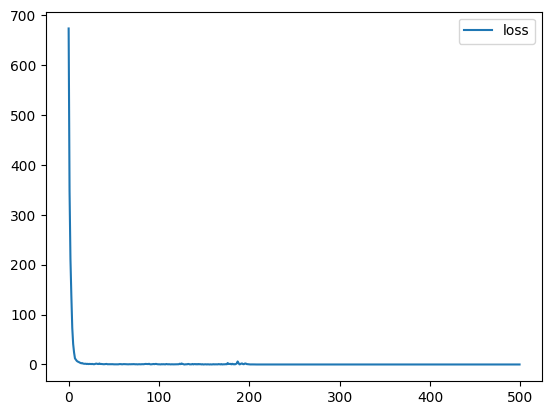

In [8]:
plt.plot(history.epoch, history.history.get('loss'),label='loss')
plt.legend()

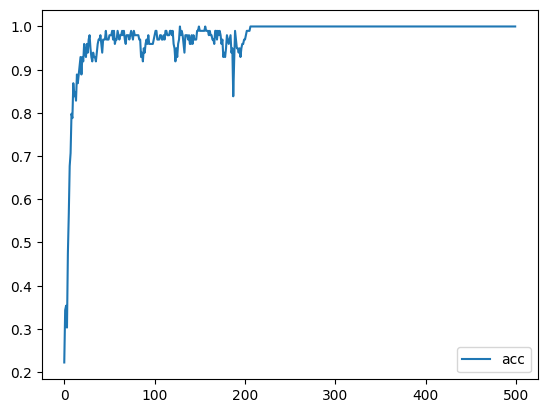

In [9]:
plt.plot(history.epoch, history.history.get('accuracy'),label='acc')

plt.legend()

In [10]:
import pandas as pd

# read features of the test set from test(inputmask).csv
data = pd.read_csv("Test(inputmask).csv")

X_test = data.drop("Id", axis=1)

X_test.shape

(50, 14)

In [ ]:
# predict the probability of the class of the patient in the test set 
pred_labels = model.predict(X_test)
print("Predicted Labels: ", pred_labels)

In [12]:
#select the max value of the probability for each patient as their predicted label
predicted_class_index = np.argmax(pred_labels, axis=1)
predicted_class_index

array([2, 4, 0, 3, 4, 1, 0, 0, 4, 4, 3, 3, 4, 4, 0, 4, 2, 3, 1, 0, 4, 0,
       3, 3, 1, 2, 1, 4, 2, 4, 1, 4, 3, 2, 0, 3, 1, 3, 1, 0, 1, 1, 1, 2,
       4, 4, 0, 1, 1, 1], dtype=int64)

In [15]:
# write the prediction results to prediction.csv
new_col = [[x] for x in predicted_class_index] 

with open('prediction.csv', 'r') as infile:
    reader = csv.reader(infile)
    rows = list(reader)


for j in range(len(rows)-1):
    rows[j+1].insert(2, new_col[j][0])


#column_name = name[i]
rows[0].insert(2, 'category')


with open('prediction.csv', 'w', newline='') as outfile:
    writer = csv.writer(outfile)
    writer.writerows(rows)